# 图像变换

In [116]:
# author: Zhijie Tan
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from PIL import Image
from pylab import *
from matplotlib.font_manager import FontProperties
import numpy as np
matplotlib.rcParams['font.sans-serif']=['Consolas-with-Yahei']
import pywt

### 离散余弦变换
公式如下：
\begin{equation}\label{eq:1}
    C(u,v)=a(u)a(v)\sum_{x=0}^{N-1}\sum_{x=0}^{N-1}f(x,y)\cos\left[\frac{(2x+1)u\pi}{2N}\right]\cos\left[\frac{(2y+1)v\pi}{2N}\right]
\end{equation}
$u,v=0,1,\cdots,N-1$
其中：
\begin{equation}\label{eq:}
    a(u)=\left\{
    \begin{aligned}
        &\sqrt{1/N}\qquad u=0\\
        &\sqrt{2/N}\qquad u = 1,2,\cdots,N-1
    \end{aligned}
    \right.
\end{equation}



In [117]:
def DCT_Matrix(N):
    u = np.linspace(0,N-1,N)
    x = u
    [X,U] = np.meshgrid(x,u)
    A = cos(np.multiply(2*X+1,U)*np.pi/2/N)
    A[0,:] *= np.sqrt(1/N)
    A[1:,:] *= np.sqrt(2/N)
    return A

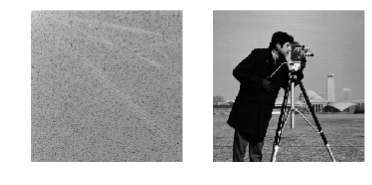

In [118]:
Im = Image.open('cameraman.tif')
Im = np.array(Im)
ny,nx = np.shape(Im)
A = DCT_Matrix(ny)
C = np.matmul(A,Im)
C = np.matmul(C,np.transpose(A))
subplot(121)
imshow(np.log(np.abs(C)),cmap='gray')
axis('off')
F = np.matmul(np.transpose(A),C)
F = np.matmul(F,A)
subplot(122)
imshow(Im,cmap='gray')
axis('off')
show()

### 小波变换
1. 序列展开
\begin{equation*}\label{eq:unfold}
    f(x) = \sum_ka_ku_k(x)
\end{equation*}

2. 缩放函数
\begin{equation*}\label{eq:zoomfunc}
    u_{j,k}(x) = 2^{j/2}u(2^jx-k)
\end{equation*}

3. 小波函数
\begin{equation*}\label{eq:waveletfunc}
    v_{j,k}(x) = 2^{j/2}v(2^jx-k)
\end{equation*}
缩放函数和小波函数是正交的，存在：
\begin{equation*}\label{eq:UVorth}
    <U_{j,m}(x),v_{j,n}(x)>=0
\end{equation*}
最广泛的小波函数包括哈儿小波，Daubechies小波和双正交小波

4. 1-D小波变换
\begin{equation*}
    f(x) = \frac{1}{\sqrt{M}}\sum_kW_u(0,k)u_{0,k}(x)+\frac{1}{\sqrt{M}}W_v(j,k)v_{j,k}(x)
\end{equation*}
where:
\begin{equation*}
    W_u(0,k) = \frac{1}{\sqrt{M}}\sum_xf(x)u_{0,k}(x)
\end{equation*}
\begin{equation*}
    W_v(j,k) = \frac{1}{\sqrt{M}}\sum_xf(x)v_{j,k}(x)
\end{equation*}

%通过展开，存在$u(x)=\sum_mh_u(m)\sqrt{2}u(2x-m)$，如果对$x$用$2^j$进行缩放，用$k$进行平移，可以得到：
%\begin{equation*}
%    \begin{aligned}
%    u(2^jx-k) & = \sum_mh_u(m)\sqrt{2}u[2(2^jx-k)-m]\\
%              & = \sum_nh_u(n-2k)\sqrt{2}u(2^{j+1}x-n)
%    \end{aligned}
%\end{equation*}

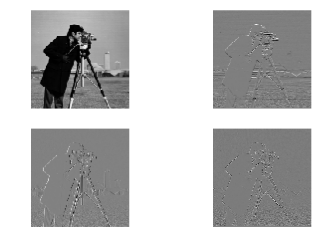

In [132]:
coeffs  = pywt.dwt2(Im,'haar')# 使用最简单的Haar小波
cA, (cH, cV, cD) = coeffs
subplot(221)
imshow(cA,cmap='gray')
axis('off')
subplot(222)
imshow(cH,cmap='gray')
axis('off')
subplot(223)
imshow(cV,cmap='gray')
axis('off')
subplot(224)
imshow(cD,cmap='gray')
axis('off')
show()